In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [ ]:
def validate_date_format(date_string):
    """
    Validates that the date string is in the 'YYYY-MM-DD' format.

    :param date_string: The date string to validate.
    :type date_string: str

    :raises ValueError: If the date string is not in the correct format.
    """
    try:
        datetime.strptime(date_string, '%Y-%m-%d')
    except ValueError:
        raise ValueError(f"{date_string} is not a valid date format. Use 'YYYY-MM-DD'.")

def validate_stock_symbol(symbol):
    """
    Validates that the given stock symbol exists and meets minimum data requirements in the yfinance database.

    :param symbol: The stock symbol to validate.
    :type symbol: str

    :raises ValueError: If the stock symbol is invalid or does not meet the necessary data requirements.
    """
    stock = yf.Ticker(symbol)
    try:
        info = stock.info
        necessary_keys = ['longName', 'sector', 'fullTimeEmployees']
        if not all(key in info for key in necessary_keys):
            raise ValueError(f"{symbol} is an invalid stock symbol or does not have accessible market data.")
    except KeyError:
        raise ValueError(f"{symbol} is an invalid stock symbol or lacks necessary data.")

def validate_positive_integer(value, value_name):
    """
    Validates that the provided value is a positive integer.

    :param value: The value to check.
    :type value: int
    :param value_name: The name of the variable to check.
    :type value_name: str

    :raises ValueError: If the value is not a positive integer.
    """
    if not (isinstance(value, int) and value > 0):
        raise ValueError(f"{value_name} must be a positive integer.")

def validate_inputs(symbol, num_years):
    """
    Validates the inputs for analyzing the payout ratio.

    :param symbol: The stock symbol to validate.
    :type symbol: str
    :param num_years: The number of years to validate.
    :type num_years: int

    :raises ValueError: If any validation fails.
    """

    validate_stock_symbol(symbol)
    validate_positive_integer(num_years, "Number of Years")

def validate_dates(start_date, end_date):
    """
    Validate the order and format of the provided start and end dates.

    :param start_date: Start date to validate.
    :type start_date: str
    :param end_date: End date to validate.
    :type end_date: str

    :raises ValueError: If dates are not in valid order or format.
    """

    start = datetime.strptime(start_date, '%Y-%m-%d')
    end = datetime.strptime(end_date, '%Y-%m-%d')
    if start >= end:
        raise ValueError(f"Validation Error: Start date {start_date} must be before end date {end_date}.")


def validate_symbols(symbols):
    """
    Validate a list of stock symbols.

    :param symbols: List of symbols to validate.
    :type symbols: list of str

    :raises ValueError: If any symbol in the list is invalid.
    """
    for symbol in symbols:
        validate_stock_symbol(symbol)




In [ ]:
def import_portfolio(file_path):
    """
    Imports a portfolio of stocks from a CSV file and converts it into a list of dictionaries.

    :param file_path: Path to the CSV file containing the portfolio data.
    :type file_path: str
    :return: A list of dictionaries, each representing a stock in the portfolio.
    :rtype: list of dict

    :author: Aman

    :raises ValueError: If the file is not a CSV or there is an error reading the file.
    """
    if not file_path.lower().endswith('.csv'):
        raise ValueError("Error: Only CSV file formats are supported.")

    try:
        portfolio_df = pd.read_csv(file_path)
        return portfolio_df.to_dict('records')
    except Exception as e:
        raise Exception(f"Error reading the portfolio file: {e}")

In [ ]:
def export_portfolio_data(portfolio, format='csv'):
    """
    Exports a portfolio of stocks with any attached data in a specified format.

    :param portfolio: DataFrame or list containing stock data.
    :type portfolio: pandas.DataFrame or list
    :param format: The format of the export ('csv' or 'json').
    :type format: str
    :return: None if exporting to file, or list of dictionaries if 'list' is specified.
    :rtype: None or list of dict

    :author: Aman

    :raises ValueError: If the format is unsupported, or an error occurs in file writing.
    """
    if not isinstance(portfolio, pd.DataFrame):
        portfolio_df = pd.DataFrame(portfolio)
    else:
        portfolio_df = portfolio

    result_data = portfolio_df.to_dict(orient='records')
    file_name = ''
    current_date = datetime.now().strftime("%Y-%m-$d")
    if format.lower() == 'csv':
        file_name = f'portfolio_data_exported_{current_date}.csv'
        portfolio_df.to_csv(file_name, index=False)
        print(f'Output File: {file_name}')
    elif format.lower() == 'json':
        file_name = f'portfolio_data_exported_{current_date}.json'
        portfolio_df.to_json(file_name, orient='records')
        print(f'Output File: {file_name}')
    else:
        raise ValueError("Unsupported format. Please choose either 'csv', 'json'")

In [ ]:
def calculate_tax_impact(dividend_income, tax_rate):
    """
    Calculate the after-tax income from dividend earnings based on the given tax rate.

    :param dividend_income: Total dividend income before tax.
    :type dividend_income: float
    :param tax_rate: Tax rate applied to the dividend income (e.g., 0.15 for 15% tax rate).
    :type tax_rate: float
    :return: After-tax income from dividends.
    :rtype: float

    :author: Divyang Abhay Sarangi

    :raises ValueError: If dividend_income or tax_rate is negative.
    """

    if dividend_income < 0:
        raise ValueError("Dividend income cannot be negative")
    if tax_rate < 0:
        raise ValueError("Tax rate cannot be negative")

    tax_amount = dividend_income * tax_rate
    after_tax_income = dividend_income - tax_amount

    return after_tax_income

In [ ]:
def fetch_stock_info(symbol):
    """
    Retrieves detailed stock information for a given stock symbol using yfinance.

    :param symbol: Stock symbol to retrieve information for.
    :type symbol: str
    :return: A dictionary containing key stock information or None if the symbol is invalid.
    :rtype: dict or None

    :author: Aman

    :raises ValueError: If the stock symbol is invalid.
    """
    validate_stock_symbol(symbol)

    stock = yf.Ticker(symbol)
    try:
        info = stock.info
        desired_info = {
            'Name': info.get('shortName', 'N/A'),
            'Sector': info.get('sector', 'N/A'),
            'Market Cap': info.get('marketCap', 'N/A'),
            'Forward PE': info.get('forwardPE', 'N/A'),
            'Dividend Yield': info.get('dividendYield', 'N/A') * 100 if info.get('dividendYield') else 'N/A',
            'Previous Close': info.get('previousClose', 'N/A'),
            '52 Week High': info.get('fiftyTwoWeekHigh', 'N/A'),
            '52 Week Low': info.get('fiftyTwoWeekLow', 'N/A'),
        }
        return desired_info
    except Exception as e:
        raise Exception(f"Error retrieving information for {symbol}: {e}")

In [ ]:
def fetch_dividend_data(symbols, start_date, end_date):
    """
    Fetches historical dividend data for a list of stock symbols between specific dates using yfinance.

    :param symbols: List of stock symbols to retrieve dividends for.
    :type symbols: list of str
    :param start_date: Start date for the dividend data collection.
    :type start_date: str
    :param end_date: End date for the dividend data collection.
    :type end_date: str
    :return: A DataFrame containing the dividends or None if symbols are invalid.
    :rtype: pandas.DataFrame or None

    :author: Aman

    :raises ValueError: If any of the stock symbols are invalid.
    """
    validate_symbols(symbols)

    dividends = {}
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        hist = stock.dividends.loc[start_date:end_date]
        # print(hist)
        # print("\n\n\n")
        dividends[symbol] = hist

    res = pd.DataFrame(dividends)

    # Replace NaN values with 0
    res.fillna(0, inplace=True)

    return res

In [ ]:
def calculate_dividend_growth_rate(symbol, num_years):
    """
    Calculates the average annual growth rate of dividends for a given stock symbol over a specified number of years.

    :param symbol: The stock symbol to analyze.
    :type symbol: str
    :param num_years: The number of years over which to calculate the growth rate.
    :type num_years: int

    :return: The average annual growth rate of dividends.
    :rtype: float

    :raises ValueError: If there is not enough data, if there are zero dividends, or if any other issue prevents calculation.

    :author: Shloka Brijesh Singh

    """

    # Validate the stock symbol and number of years
    validate_stock_symbol(symbol)
    validate_positive_integer(num_years, "Number of Years")

    # Fetch the stock data using the yfinance library
    stock = yf.Ticker(symbol)

    # Resample the dividend data annually and sum it to get total dividends per year
    dividends = stock.dividends.resample('Y').sum()

    # Focus on the dividends for the last `num_years` of dividends
    dividends = dividends[-num_years:]

    # Check if we have enough data points to calculate growth rate (at least 2 years)
    if len(dividends) < 2:
        raise ValueError(f"Not enough data to calculate growth rate for {symbol}. At least 2 years of data are required.")

    # Ensure no zero dividends for calculation
    if any(dividends == 0):
        raise ValueError("Cannot calculate growth rate due to zero dividends in the period.")

    # Calculate the yearly dividend growth rates
    growth_rates = dividends.pct_change().dropna()

    # Compute the average of these growth rates to get the average annual growth rate
    average_growth_rate = growth_rates.mean()

    if pd.isna(average_growth_rate):
        raise ValueError("Unable to compute an average growth rate due to insufficient data.")

    return average_growth_rate


In [ ]:
def project_future_dividends(symbol, num_years, growth_rate):
    """
    Projects future dividends for a given stock symbol based on the most recent dividend and a specified growth rate.

    :param symbol: The stock symbol for which to project future dividends.
    :type symbol: str
    :param num_years: The number of years into the future to project the dividends.
    :type num_years: int
    :param growth_rate: The annual growth rate of the dividends, expressed as a decimal.
    :type growth_rate: float

    :return: A list of projected dividend amounts for each year, from the first year to num_years.
    :rtype: list

    :raises ValueError: If the stock symbol is invalid, if num_years is not a positive integer, if growth_rate is not a numeric value, or if there is no recent dividend data.ot have any recent dividend data.
    :author: Shloka Brijesh Singh

    """

    validate_stock_symbol(symbol)
    validate_positive_integer(num_years, "Number of Years")
    if not isinstance(growth_rate, (int, float)):
        raise ValueError("Growth rate must be a numeric value.")

    stock = yf.Ticker(symbol)

    if stock.dividends.empty:
        raise ValueError(f"No dividend data available for {symbol}.")

    # Take the most recent dividend paid
    last_dividend = stock.dividends[-1]

    # Project future dividends based on the most recent dividend and the growth rate
    future_dividends = [last_dividend * ((1 + growth_rate) ** i) for i in range(1, num_years + 1)]

    return future_dividends


In [ ]:
def calculate_portfolio_income(portfolio, start_date, end_date):
    """
    Calculates the total income from dividends for a specified portfolio of stocks within a given date range.
    This function iterates through a list of stocks, validates the stock symbol, and calculates the total dividend income
    based on the stock's dividend history between the specified start and end dates. It handles validation for the date
    format and checks for valid stock symbols using yfinance data.

    :param portfolio: A list of dictionaries where each dictionary contains 'stock_code' (str) and 'quantity' (int).
    :type portfolio: list
    :param start_date: The starting date of the period for which to calculate dividends ('YYYY-MM-DD').
    :type start_date: str
    :param end_date: The ending date of the period for which to calculate dividends ('YYYY-MM-DD').
    :type end_date: str

    :return: The total income from dividends over the specified period for the given portfolio.
    :rtype: float

    :raises ValueError: If either the start_date or end_date are in an invalid format, or if a stock symbol is invalid.
    :raises Exception: Catches and logs exceptions related to data retrieval issues or dividend calculation problems.

    :author: Shloka Brijesh Singh
    """
    # Assume validate_date_format will raise ValueError if there's a problem
    validate_date_format(start_date)
    validate_date_format(end_date)

    total_income = 0
    for stock in portfolio:
        symbol = stock['stock_code']
        quantity = stock['quantity']

        # This will raise an exception if the symbol is invalid
        validate_stock_symbol(symbol)

        stock_info = yf.Ticker(symbol)
        try:
            dividends = stock_info.dividends[start_date:end_date]
            if dividends.empty:
                continue  # Optionally, could handle this differently or log a warning
            income = dividends.sum() * quantity
            total_income += income
        except Exception as e:
            # Rather than just logging, you might want to handle this more robustly depending on your application's needs
            raise Exception(f"Error processing dividends for {symbol}: {e}")

    return total_income


In [ ]:
def analyze_payout_ratio(symbol, num_years):
    """
    Analyze the dividend payout ratio over a specified number of years for a given stock symbol.

    :param symbol: Stock symbol to analyze.
    :type symbol: str
    :param num_years: Number of years to consider for the payout ratio analysis.
    :type num_years: int
    :return: A pandas Series with payout ratios per year or None if data is insufficient or error occurs.
    :rtype: pandas.Series or None

    :author: Vatsal

    :raises ValueError: If there are input validation errors or insufficient data.
    """

    validate_stock_symbol(symbol)
    validate_positive_integer(num_years, "Number of Years")

    stock = yf.Ticker(symbol)
    hist = stock.history(period=f"{num_years}y")
    dividends = hist['Dividends'].resample('Y').sum()

    # Attempt to fetch earnings data and align it with the dividend data
    try:
        # Convert to timezone-naive if necessary
        financials = stock.financials.T['Net Income'] if 'Net Income' in stock.financials.T else pd.Series(dtype=float)
        financials.index = pd.to_datetime(financials.index).tz_localize(None)
        dividends.index = dividends.index.tz_localize(None)

        # Align financials data with dividends data
        financials = financials.reindex(dividends.index, method='nearest')
        shares_annual = stock.info['sharesOutstanding']
        eps_annual = financials / shares_annual
    except Exception as e:
        raise ValueError(f"Unable to fetch earnings data: {e}")

    # Check for sufficient data
    if dividends.empty or eps_annual.empty or eps_annual.isnull().any():
        raise ValueError(f"Insufficient data to calculate payout ratio for {symbol}.")

    # Calculate payout ratio where earnings are non-zero to avoid division by zero
    eps_non_zero = eps_annual[eps_annual != 0]
    payout_ratios = dividends[eps_non_zero.index] / eps_non_zero

    payout_ratios = round(payout_ratios.astype(float), 2)

    return payout_ratios

In [ ]:
def compare_dividend_stocks(symbols, start_date, end_date):
    """
    Compare dividend stocks based on total dividends, average yield, and growth rate between given dates.

    :param symbols: List of stock symbols to compare.
    :type symbols: list of str
    :param start_date: Start date for the dividend data collection.
    :type start_date: str
    :param end_date: End date for the dividend data collection.
    :type end_date: str
    :return: A DataFrame containing comparison results or None if input validation fails.
    :rtype: pandas.DataFrame or None

    :author: Vatsal

    :raises ValueError: If input validation fails.
    """

    validate_dates(start_date, end_date)
    if not all(isinstance(symbol, str) and symbol.isalpha() for symbol in symbols):
        raise ValueError("All symbols must be valid stock symbols.")

    results = pd.DataFrame(columns=["Symbol", "Total Dividends", "Average Yield", "Growth Rate"])

    for symbol in symbols:
        stock = yf.Ticker(symbol)
        div_data = stock.dividends.loc[start_date:end_date]
        price_data = stock.history(start=start_date, end=end_date)['Close']

        # Calculate total dividends
        total_dividends = div_data.sum()

        # Calculate average yield
        if not div_data.empty:
            yields = div_data / price_data.reindex(div_data.index) * 100
            average_yield = yields.mean()
        else:
            average_yield = np.nan  # No dividends to calculate yield

        # Calculate growth rate
        yearly_dividends = div_data.resample('Y').sum()
        growth_rate = yearly_dividends.pct_change().mean()

        # Create a temporary DataFrame for this symbol's results
        temp_df = pd.DataFrame({
            "Symbol": [symbol],
            "Total Dividends": [total_dividends],
            "Average Yield": [average_yield],
            "Growth Rate": [growth_rate]
        })

        results = pd.concat([results, temp_df], ignore_index=True)

    # Formatting results for output
    results['Average Yield'] = results['Average Yield'].apply(lambda x: f"{x:.2f}%" if pd.notnull(x) else "N/A")
    results['Growth Rate'] = results['Growth Rate'].apply(lambda x: f"{x:.2%}" if pd.notnull(x) else "N/A")

    return results


In [ ]:
def generate_dividend_report(portfolio, start_date, end_date, tax_rate=0.15):
    """
    Generate a report of dividends for a portfolio of stocks, including tax implications, over a specific period.

    :param portfolio: List of dictionaries detailing each stock's code and quantity in the portfolio.
    :type portfolio: list of dict
    :param start_date: Start date for the dividend data collection.
    :type start_date: str
    :param end_date: End date for the dividend data collection.
    :type end_date: str
    :param tax_rate: Tax rate applied to dividends, defaults to 15%.
    :type tax_rate: float
    :return: A DataFrame detailing dividends, growth, tax implications, and after-tax income for each stock, or None if date validation fails.
    :rtype: pandas.DataFrame or None

    :author: Vatsal

    :raises ValueError: If date validation fails, tax rate is out of expected range, or portfolio entries are invalid.
    """

    validate_dates(start_date, end_date)
    if not isinstance(tax_rate, (float, int)) or tax_rate < 0 or tax_rate > 1:
        raise ValueError("Tax rate must be a decimal between 0 and 1.")


    results = pd.DataFrame(columns=['Stock', 'Total Dividends', 'Dividend Growth', 'Tax Rate', 'After-Tax Income'])

    for entry in portfolio:
        if not isinstance(entry, dict) or 'stock_code' not in entry or 'quantity' not in entry:
            raise ValueError("Validation Error: Each entry in the portfolio must be a dictionary with 'stock_code' and 'quantity'.")
        if not isinstance(entry['quantity'], int) or entry['quantity'] <= 0:
            raise ValueError("Validation Error: 'quantity' must be a positive integer.")

        symbol = entry['stock_code']
        quantity = entry['quantity']

        validate_stock_symbol(symbol)

        # Fetch and process dividend data
        stock = yf.Ticker(symbol)
        div_data = stock.dividends.loc[start_date:end_date]
        total_dividends = round(div_data.sum() * quantity, 2)

        # Calculate growth rate
        yearly_dividends = div_data.resample('Y').sum()
        growth_rate = yearly_dividends.pct_change().dropna().mean()

        # Calculate tax implications
        tax_amount = total_dividends * tax_rate
        after_tax_income = total_dividends - tax_amount

        # Create a DataFrame for this stock's results
        temp_df = pd.DataFrame({
            'Stock': [symbol],
            'Total Dividends': [total_dividends],
            'Dividend Growth': [f"{growth_rate:.2%}" if not pd.isna(growth_rate) else 'N/A'],
            'Tax Rate': [f"{tax_rate:.2%}"],
            'After-Tax Income': [round(after_tax_income, 2)]
        })

        # Append the temporary DataFrame to the results DataFrame using concat
        results = pd.concat([results, temp_df], ignore_index=True)

    return results

In [ ]:
def plot_future_dividends(symbol, num_years, future_dividends):
    """
    Plot the projected future dividends for a given stock symbol over a specified number of years.

    :param symbol: Stock symbol for which future dividends are plotted.
    :type symbol: str
    :param num_years: Number of years for which future dividends are projected.
    :type num_years: int
    :param future_dividends: List of projected dividend amounts for each year.
    :type future_dividends: list of float
    :return: None

    :author: Divyang Abhay Sarangi

    :raises ValueError: If symbol is not a string, num_years is not an integer, or the length of future_dividends
                        does not match num_years.
    """

    if not isinstance(symbol, str) or not isinstance(num_years, int) or len(future_dividends) != num_years:
        raise ValueError("Invalid inputs")

    current_year = datetime.now().year
    years = [current_year + i for i in range(1, num_years + 1)]

    # Create a figure with higher resolution
    plt.figure(figsize=(10, 6), dpi=100)

    # Create a line plot
    plt.plot(years, future_dividends, color='dodgerblue', marker='o', linestyle='-', linewidth=2, markersize=8)

    # Add value annotations on each point
    for i, txt in enumerate(future_dividends):
        plt.annotate(f'{txt:.4f}', (years[i], future_dividends[i]), textcoords="offset points", xytext=(0,10), ha='center')

    # Enhancing the chart with labels and title
    plt.title(f'Projected Future Dividends for {symbol} Over {num_years} Years', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Dividend Amount ($)', fontsize=14)
    plt.xticks(years, fontsize=12)  # Ensure every year is marked clearly
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability of the plot

    # Show the plot
    plt.tight_layout()  # Adjust layout to make room for the annotations
    plt.show()

In [ ]:
def plot_payout_ratios(symbol, num_years):
    """
    Plot the payout ratios for a given stock symbol over a specified number of years.

    :param symbol: Stock symbol for which payout ratios are plotted.
    :type symbol: str
    :param num_years: Number of years for which payout ratios are analyzed.
    :type num_years: int
    :return: None

    :author: Divyang Abhay Sarangi

    :raises ValueError: If symbol is not a string or num_years is not a positive integer.
    """

    if not isinstance(symbol, str):
        raise ValueError("Symbol must be a string.")
    if not isinstance(num_years, int) or num_years <= 0:
        raise ValueError("Number of years must be a positive integer.")

    payout_ratios = analyze_payout_ratio(symbol, num_years)

    if payout_ratios is None:
        print("Failed to fetch or calculate payout ratios.")
        return

    # Plot the payout ratios using a bar chart
    plt.figure(figsize=(10, 5))
    bars = plt.bar(payout_ratios.index.year, payout_ratios, color='navy')

    # Adding value annotations to each bar for precise data reading
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.4f}", va='bottom', ha='center', fontsize=10)

    # Set the chart title and labels
    plt.title(f'Payout Ratios for {symbol} Over the Last {num_years} Years', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Payout Ratio', fontsize=14)
    plt.xticks(payout_ratios.index.year)  # Set x-axis labels to each year
    plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)  # Lighter grid
    plt.tight_layout()  # Adjust layout to make room for the annotations

    # Show the plot
    plt.show()


In [ ]:
def plot_total_dividends(data):
    """
    Plot the total dividends comparison for different companies.

    :param data: DataFrame containing 'Symbol' and 'Total Dividends' columns.
    :type data: pandas.DataFrame
    :return: None

    :author: Divyang Abhay Sarangi

    :raises ValueError: If data is not a pandas DataFrame or if it does not contain required columns.
    """

    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    if 'Symbol' not in data.columns or 'Total Dividends' not in data.columns:
        raise ValueError("Input data must contain 'Symbol' and 'Total Dividends' columns.")

    plt.figure(figsize=(10, 5))
    bars = plt.bar(data['Symbol'], data['Total Dividends'], color='teal')

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", va='bottom', ha='center', fontsize=10)

    plt.title('Total Dividends Comparison')
    plt.xlabel('Company')
    plt.ylabel('Total Dividends')
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
def plot_average_yield(data):
    """
    Plot the comparison of average yield for different companies.

    :param data: DataFrame containing 'Symbol' and 'Average Yield' columns.
    :type data: pandas.DataFrame
    :return: None

    :author: Divyang Abhay Sarangi

    :raises ValueError: If data is not a pandas DataFrame or if it does not contain required columns.
    """

    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    if 'Symbol' not in data.columns or 'Average Yield' not in data.columns:
        raise ValueError("Input data must contain 'Symbol' and 'Average Yield' columns.")

    # Ensure 'Average Yield' is in the correct format, converting if necessary
    if data['Average Yield'].dtype == object:
        data['Average Yield'] = data['Average Yield'].replace('N/A', np.nan).str.rstrip('%').astype(float) / 100

    plt.figure(figsize=(10, 5))
    bars = plt.bar(data['Symbol'], data['Average Yield'], color='skyblue')

    for bar in bars:
        yval = bar.get_height()
        if pd.notnull(yval):  # Only add text labels to bars with non-NaN heights
            plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", va='bottom', ha='center', fontsize=10)

    plt.title('Average Yield Comparison')
    plt.xlabel('Company')
    plt.ylabel('Average Yield')
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.show()

In [ ]:
def plot_growth_rate(data):
    """
    Plot the comparison of growth rate for different companies.

    :param data: DataFrame containing 'Symbol' and 'Growth Rate' columns.
    :type data: pandas.DataFrame
    :return: None

    :author: Divyang Abhay Sarangi

    :raises ValueError: If data is not a pandas DataFrame or if it does not contain required columns.
    """
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame.")

    if 'Symbol' not in data.columns or 'Growth Rate' not in data.columns:
        raise ValueError("Input data must contain 'Symbol' and 'Growth Rate' columns.")

    # Check if 'Growth Rate' needs conversion from percentage strings to floats
    if data['Growth Rate'].dtype == object:
        data['Growth Rate'] = data['Growth Rate'].replace('N/A', np.nan).str.rstrip('%').astype(float) / 100

    plt.figure(figsize=(10, 5))
    bars = plt.bar(data['Symbol'], data['Growth Rate'], color='purple')

    for bar in bars:
        yval = bar.get_height()
        # Only add text labels if yval is not NaN
        if pd.notnull(yval):
            plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2%}", va='bottom', ha='center', fontsize=10)

    plt.title('Growth Rate Comparison')
    plt.xlabel('Company')
    plt.ylabel('Growth Rate')
    plt.grid(True, which='major', linestyle='--', alpha=0.7)
    plt.show()


## All functionality demonstration code

In [ ]:
# Testing fetch_stock_info with error handling
try:
    print("Testing fetch_stock_info for 'AAPL':")
    stock_info = fetch_stock_info('AAPL')
    for info in stock_info:
        print(f"{info}:\t{stock_info[info]}")
except Exception as e:
    print(f"Error during testing fetch_stock_info: {e}")

# Testing import_portfolio with error handling
try:
    print("\nTesting import_portfolio:")
    file_name = input("Enter portfolio file name (.csv):")
    portfolio = import_portfolio(file_name)
    print("Retrieved Data:")
    for data in portfolio:
        print(data)
except Exception as e:
    print(f"Error during testing import_portfolio: {e}")

Testing fetch_stock_info for 'AAPL':
Name:	Apple Inc.
Sector:	Technology
Market Cap:	2817640890368
Forward PE:	25.379835
Dividend Yield:	0.5499999999999999
Previous Close:	182.74
52 Week High:	199.62
52 Week Low:	164.08

Testing import_portfolio:
Enter portfolio file name (.csv):portfolio_b.csv
Retrieved Data:
{'stock_code': 'INTC', 'quantity': 5000, 'start_date': '2022-03-11'}
{'stock_code': 'AMD', 'quantity': 1200, 'start_date': '2023-01-05'}
{'stock_code': 'NVDA', 'quantity': 4500, 'start_date': '2022-04-08'}
{'stock_code': 'BABA', 'quantity': 350, 'start_date': '2022-08-20'}
{'stock_code': 'SONY', 'quantity': 800, 'start_date': '2021-07-22'}


In [ ]:
# Testing fetch_dividend_data with error handling
try:
    print("Testing fetch_dividend_data for all stocks from 2022-01-01 to now:")
    current_date = datetime.now().strftime("%Y-%m-%d")
    stock_symbols = [stock_data["stock_code"] for stock_data in portfolio]
    # print(stock_symbols)
    dividend_data = fetch_dividend_data(stock_symbols, '2021-01-01', current_date)
    print(dividend_data)
except Exception as e:
    print(f"Error during testing fetch_dividend_data: {e}")

# Testing export_portfolio_data with error handling
try:
    print("\nExporting portfolio dividends data for all stocks:")
    export_portfolio_data(portfolio, format='json')
except Exception as e:
    print(f"Error during testing export_portfolio_data: {e}")

Testing fetch_dividend_data for all stocks from 2022-01-01 to now:
                            INTC  AMD  NVDA  BABA  SONY
Date                                                   
2021-02-04 00:00:00-05:00  0.348  0.0  0.00   0.0   0.0
2021-03-09 00:00:00-05:00  0.000  0.0  0.04   0.0   0.0
2021-05-06 00:00:00-04:00  0.348  0.0  0.00   0.0   0.0
2021-06-09 00:00:00-04:00  0.000  0.0  0.04   0.0   0.0
2021-08-05 00:00:00-04:00  0.348  0.0  0.00   0.0   0.0
2021-08-31 00:00:00-04:00  0.000  0.0  0.04   0.0   0.0
2021-11-04 00:00:00-04:00  0.348  0.0  0.00   0.0   0.0
2021-12-01 00:00:00-05:00  0.000  0.0  0.04   0.0   0.0
2022-02-04 00:00:00-05:00  0.365  0.0  0.00   0.0   0.0
2022-03-02 00:00:00-05:00  0.000  0.0  0.04   0.0   0.0
2022-05-05 00:00:00-04:00  0.365  0.0  0.00   0.0   0.0
2022-06-08 00:00:00-04:00  0.000  0.0  0.04   0.0   0.0
2022-08-04 00:00:00-04:00  0.365  0.0  0.00   0.0   0.0
2022-09-07 00:00:00-04:00  0.000  0.0  0.04   0.0   0.0
2022-11-04 00:00:00-04:00  0.365  0.0

In [ ]:
# Demonstrate dividend_growth_rate function

num_years = 10
symbol = portfolio[0]["stock_code"]

try:
    growth_rate = calculate_dividend_growth_rate(symbol, num_years)
    if growth_rate is not None:
        print(f"Growth rate for {symbol} over the last {num_years} years: {growth_rate:.2f}")
    else:
        print(f"Failed to calculate growth rate for {symbol} over the last {num_years} years.")
except Exception as e:
    print(e)


num_years = 1
try:
    growth_rate_short = calculate_dividend_growth_rate(symbol, num_years)
    if growth_rate_short is not None:
        print(f"Growth rate for {symbol} over the last {num_years} year: {growth_rate_short}")
    else:
        print(f"Failed to calculate growth rate for {symbol} over the last {num_years} year.")
except Exception as e:
    print(e)


Growth rate for INTC over the last 10 years: -0.08
Not enough data to calculate growth rate for INTC. At least 2 years of data are required.


In [ ]:
symbol = "AAPL"
positive_growth_rate = 0.05  # 5%
num_years = 5  # Number of years to project

try:
    positive_projections = project_future_dividends(symbol, num_years, positive_growth_rate)
    if positive_projections:
        rounded_positive_projections = [round(proj, 2) for proj in positive_projections]
        print(f"Positive Growth Projections for {symbol}:", rounded_positive_projections)
    else:
        print(f"No positive projections available for {symbol}.")
except Exception as e:
    print(f"Error calculating positive projections for {symbol}: {e}")

Positive Growth Projections for AAPL: [0.25, 0.26, 0.28, 0.29, 0.31]


In [ ]:
symbol = "AAPL"
negative_growth_rate = -0.03  # -3%
num_years = 5  # Number of years to project

try:
    negative_projections = project_future_dividends(symbol, num_years, negative_growth_rate)
    if negative_projections:
        rounded_negative_projections = [round(proj, 2) for proj in negative_projections]
        print(f"Negative Growth Projections for {symbol}:", rounded_negative_projections)
    else:
        print(f"No negative projections available for {symbol}.")
except Exception as e:
    print(f"Error calculating negative projections for {symbol}: {e}")

Negative Growth Projections for AAPL: [0.23, 0.23, 0.22, 0.21, 0.21]


In [ ]:
# Test to calculate income for Portfolio
try:
    total_income = calculate_portfolio_income(portfolio, "2022-01-01", "2023-01-01")
    print(f"Total income for Portfolio from 2022-01-01 to 2023-01-01: {total_income}")
except Exception as e:
    print(e)


Total income for Portfolio from 2022-01-01 to 2023-01-01: 8020.0


In [ ]:
# Test with invalid date format
try:
    total_income_invalid_date = calculate_portfolio_income(portfolio, "20220101", "2023-01-01")
    print(f"Total income with invalid start date format: {total_income_invalid_date}")
except ValueError as e:
    print(f"Error calculating total income for Portfolio: {e}")


Error calculating total income for Portfolio: 20220101 is not a valid date format. Use 'YYYY-MM-DD'.


In [ ]:
# Test by Defining a portfolio with stocks known to have zero or no dividends
portfolio_zero_dividend = [
    {"stock_code": "BRK-A", "quantity": 1, "start_date": "2022-01-01"},  # Berkshire Hathaway typically does not pay dividends
    {"stock_code": "GOOGL", "quantity": 10, "start_date": "2022-01-01"}   # Google, also typically without dividends
]

# Calculate income for a portfolio expected to have zero income
try:
    total_income_zero_dividends = calculate_portfolio_income(portfolio_zero_dividend, "2022-01-01", "2023-01-01")
    print(f"Total income for a portfolio with expected zero dividends: {total_income_zero_dividends}")
except Exception as e:
    print(e)


Total income for a portfolio with expected zero dividends: 0


In [ ]:
# Define a portfolio with a non-existent stock symbol
portfolio_with_fake_stock = [
    {"stock_code": "FAKE123", "quantity": 20, "start_date": "2022-01-01"}
]

# Calculate income for a portfolio containing a fake stock
try:
    total_income_fake_stock = calculate_portfolio_income(portfolio_with_fake_stock, "2022-01-01", "2023-01-01")
    print(f"Total income for Portfolio with a fake stock: {total_income_fake_stock}")
except Exception as e:
    print(e)


ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FAKE123?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FAKE123&crumb=.ZdyhQ%2F0uux


FAKE123 is an invalid stock symbol or does not have accessible market data.


In [ ]:
# Calculate income for a very short period
try:
    total_income_short_period = calculate_portfolio_income(portfolio, "2023-03-15", "2023-03-31")
    print(f"Total income for Portfolio over a very short period: {total_income_short_period}")
except Exception as e:
    print(e)

Total income for Portfolio over a very short period: 0


In [ ]:
# Calculate income for a period before the stock was listed
try:
    total_income_before_listing = calculate_portfolio_income(portfolio, "1920-01-01", "1921-12-31")
    # Round the total income to 2 decimal places
    rounded_total_income = round(total_income_before_listing, 2)
    print(f"Total income for Portfolio before stocks were listed: {rounded_total_income}")
except Exception as e:
    print(f"Error calculating total income before stocks were listed: {e}")

Total income for Portfolio before stocks were listed: 0


In [ ]:
# Calculate payout ratios
try:
    print(f"Payout ratios for AAPL over the last 5 years:")
    payout_ratios = analyze_payout_ratio('AAPL', 5)
    print(payout_ratios)
except ValueError as e:
    print(f"Error while analyzing payout ratios: {e}")

try:
    symbols_list = [stock_data["stock_code"] for stock_data in portfolio]
    print("\n\nDividend stock comparison:")
    comparison_results = compare_dividend_stocks(symbols_list, '2020-01-01', '2022-12-31')
    print(comparison_results)
except ValueError as e:
    print(f"Error while comparing dividend stocks: {e}")

try:
    print("\n\nDividend report:")
    dividend_report = generate_dividend_report(portfolio, '2020-01-01', '2022-12-31', 0.23)
    print(dividend_report)
except ValueError as e:
    print(f"Error while generating dividend report: {e}")


Payout ratios for AAPL over the last 5 years:
Date
2019-12-31    0.15
2020-12-31    0.22
2021-12-31    0.14
2022-12-31    0.14
2023-12-31    0.15
2024-12-31    0.04
dtype: float64


Dividend stock comparison:
  Symbol  Total Dividends Average Yield Growth Rate
0   INTC            4.172         0.79%       5.17%
1    AMD            0.000           N/A         N/A
2   NVDA            0.480         0.03%       0.00%
3   BABA            0.000           N/A         N/A
4   SONY            0.000           N/A         N/A


Dividend report:
  Stock  Total Dividends Dividend Growth Tax Rate  After-Tax Income
0  INTC          20860.0           5.17%   23.00%           16062.2
1   AMD              0.0             N/A   23.00%               0.0
2  NVDA           2160.0           0.00%   23.00%            1663.2
3  BABA              0.0             N/A   23.00%               0.0
4  SONY              0.0             N/A   23.00%               0.0


In [ ]:
# Testing analyze_payout_ratio with an invalid stock symbol

try:
    print(f"Payout ratios for XYZ (an invalid symbol) over the last 5 years:")
    payout_ratios = analyze_payout_ratio('XYZ', 5)
    print(payout_ratios)
except Exception as e:  # Catching a broad exception for demonstration
    print(f"Error while analyzing payout ratios: {e}")

# Testing compare_dividend_stocks with incorrect date formats
try:
    symbols_list = ['AAPL', 'MSFT', 'NVDA']
    print("\nDividend stock comparison with incorrect date format:")
    comparison_results = compare_dividend_stocks(symbols_list, '01-2020-01', '31-2022-12')
    print(comparison_results)
except Exception as e:  # Catching a broad exception for demonstration
    print(f"Error while comparing dividend stocks: {e}")

Payout ratios for XYZ (an invalid symbol) over the last 5 years:
Error while analyzing payout ratios: XYZ is an invalid stock symbol or does not have accessible market data.

Dividend stock comparison with incorrect date format:
Error while comparing dividend stocks: time data '01-2020-01' does not match format '%Y-%m-%d'


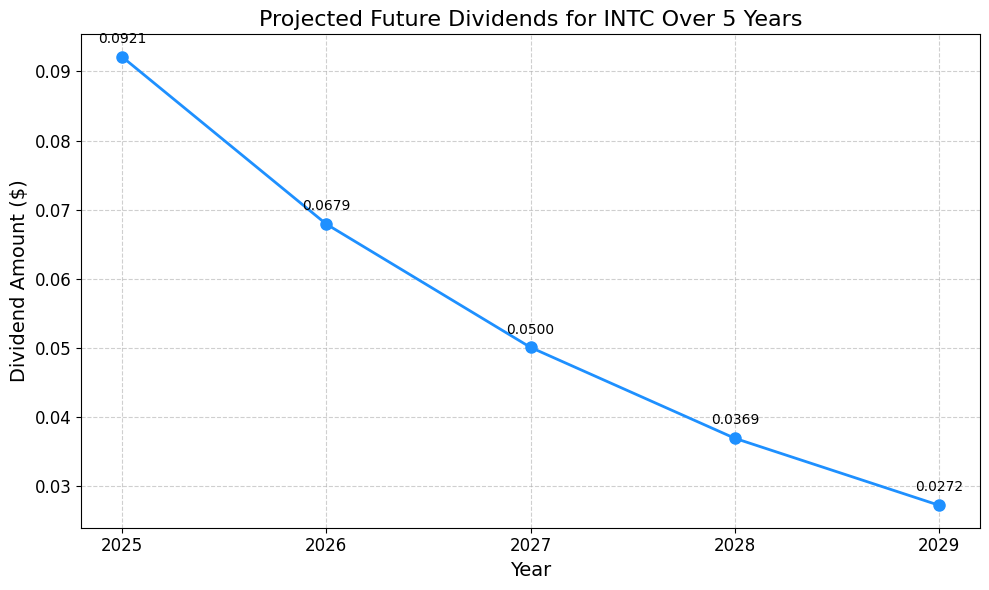

In [ ]:
try:
    stock_symbol = portfolio[0]["stock_code"]
    num_years = 5
    growth_rate = calculate_dividend_growth_rate(stock_symbol, num_years)
    future_dividends = project_future_dividends(stock_symbol, num_years, growth_rate)
    plot_future_dividends(stock_symbol, num_years, future_dividends)
except Exception as e:
    print(e)

In [ ]:
try:
    stock_symbol = portfolio[1]["stock_code"]
    num_years = 5
    growth_rate = calculate_dividend_growth_rate(stock_symbol, num_years)
    future_dividends = project_future_dividends(stock_symbol, num_years, growth_rate)
    plot_future_dividends(stock_symbol, num_years, future_dividends)
except Exception as e:
    print(e)

Not enough data to calculate growth rate for AMD. At least 2 years of data are required.


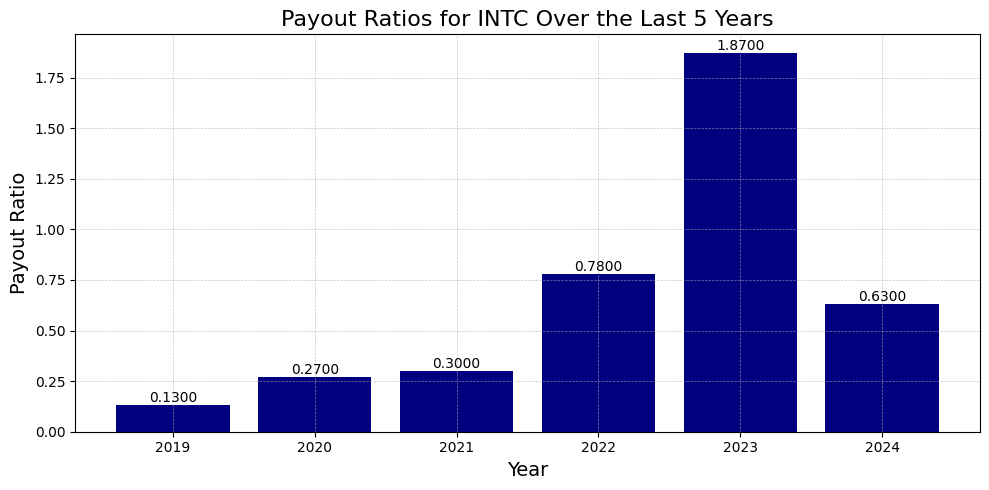

In [ ]:
# Plot payout ratios

try:
    stock_symbol = portfolio[0]["stock_code"]
    plot_payout_ratios(stock_symbol, 5)
except Exception as e:
    print(e)

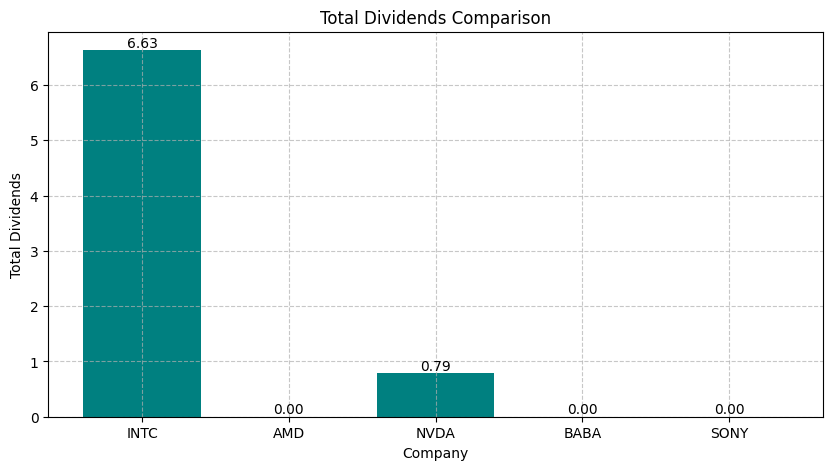

In [ ]:
# Assuming the result from compare_dividend_stocks is stored in a variable called `results_data`
results_data = pd.DataFrame([])
try:
    stock_symbols = [stock_data["stock_code"] for stock_data in portfolio]
    results_data = compare_dividend_stocks(stock_symbols, '2018-01-01', '2022-12-31')

    # Plotting total dividends
    plot_total_dividends(results_data)
except Exception as e:
    print(e)

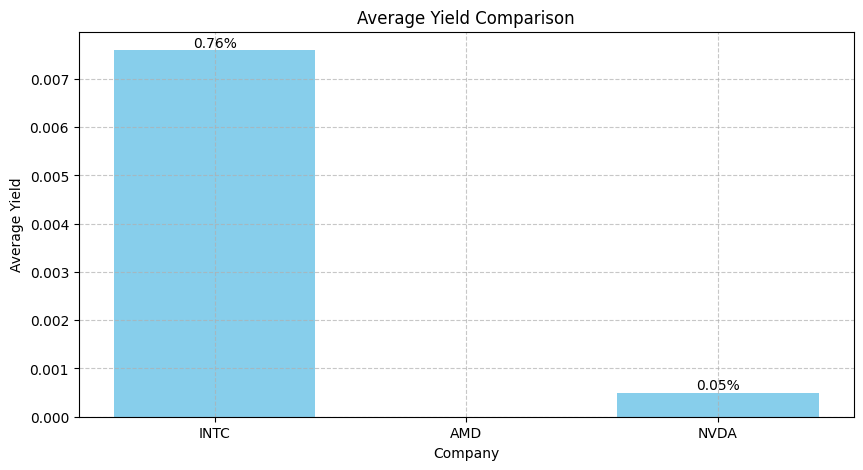

In [ ]:
# Plotting average yield
try:
    plot_average_yield(results_data)
except Exception as e:
    print(e)

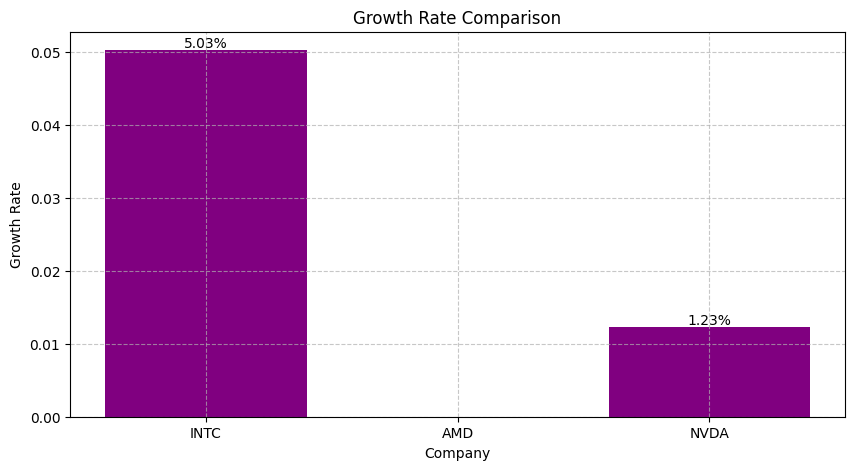

In [ ]:
try:
    plot_growth_rate(results_data)
except Exception as e:
    print(e)